<a href="https://colab.research.google.com/github/Sandro927/2D-Pygame-Space-Shooting-Game/blob/main/Alejandro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Welcome to the ***EXACT*** intro to Machine Learning!
You can this example as a template to build your own ML model for your project. This example is intended to run with *test_data.csv* and *train_data.csv*, both of which are included in the Hardware/Z Presentations/Intro to ML folder on Google Drive.

This example demonstrates how EM testing can be automated using machine learning. To keep this example simple, only air temperature is used to judge the testing result. It can be expanded to include cylinder temperatures, differential temperatures (diff. between set and air), controller temperatures, wall temperatures, etc.

To work through the example, press the "run" button in the top left corner of each code block. You can also add your own code blocks by pressing "+ Code" in the top left of this window

In [ ]:
# STEP 1
# To run the following code, you will first need to import all the required libraries. Press the "run" button to import the following libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import sys

### **2.** Import data sets
To make the training and testing data set files available to the following code, make sure that they have been included in this project. Click on the folder icon on the left of this page to view your files. If you don't see 'test_data.csv' and 'train_data.csv', click "Upload to session storage" (file icon with upwards arrow). Then select 'test_data.csv' and 'train_data.csv' from your computer - they can be downloaded from Hardware/Z Presentations/Intro to ML folder on Google Drive.

In [ ]:
# STEP 2
# Import the training data. If an error presents while running this, follow the steps in the above text block.
dataset = pd.read_csv('/content/train_data.csv')      # Import train_data.csv from local files
data_features = dataset.copy()                        # Convert csv data to usable format
data_labels = data_features.pop('LABEL')              # Store the LABEL column in the data set in data_labels

print(data_features)

        0     1     2     3     4     5  ...    58    59    60    61    62    63
0    35.5  34.3  39.0  38.7  41.7  43.3  ...  33.5  31.4  31.0  30.8  29.0  29.1
1    36.0  38.3  39.8  40.4  41.5  42.9  ...  32.2  30.1  30.4  29.6  28.9  27.7
2    36.3  37.7  39.0  40.3  39.8  42.8  ...  32.3  33.4  32.4  32.2  32.0  29.5
3    34.2  39.0  39.8  41.0  41.6  43.3  ...  31.8  32.1  31.3  30.4  30.0  30.4
4    35.1  38.2  39.9  41.5  42.5  43.6  ...  32.8  30.8  30.0  29.5  29.6  29.9
..    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
208  35.3  37.6  38.9  40.9  42.0  43.7  ...  38.8  39.0  36.5  35.8  35.1  34.2
209  34.7  35.3  36.3  37.4  38.6  39.7  ...  44.6  43.7  42.8  41.8  40.9  39.9
210  34.8  35.7  36.7  37.9  39.0  40.3  ...  44.2  43.3  42.3  41.3  40.5  39.6
211  34.3  36.9  37.9  39.7  40.8  42.4  ...  40.3  38.6  38.1  37.7  37.4  36.3
212  33.6  36.1  36.8  39.0  39.7  43.2  ...  41.1  40.1  38.9  37.2  37.4  36.7

[213 rows x 64 columns]


### **3.** Build the neural network
As outlined in the presentation, you will need to define the shape of your neural network. Here, our input layer will have 64 points, one for each 15-min interval temperature reading on the EM during testing. This layer will map to a 16-nuerone hidden layer, then finally map to one of four results on the output layer [Pass, Fail (reason 1), Fail (reason 2), Fail (reason 3)].

In [ ]:
# STEP 3
# Define the neural network

motion_model = tf.keras.Sequential([
                                    keras.layers.Flatten(input_shape=(64,1)),       # Input layer
                                    keras.layers.Dense(16, activation=tf.nn.relu),  # Hidden layer
                                    keras.layers.Dense(4, activation=tf.nn.softmax) # Output layer
])

motion_model.compile(optimizer=tf.optimizers.Adam(),    # Compile the model based on above definitions 
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

print(motion_model.summary())                           # Print a summary below of neural network structure

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 68        
Total params: 1,108
Trainable params: 1,108
Non-trainable params: 0
_________________________________________________________________
None


### **4.** Train your model
This is the crux of the code, and one of the many reasons TensorFlow has made ML so simple.
Press the run button to train the model with iterative 100 cycles (number of epochs).

In [ ]:
# STEP 4
# Train the model! 
motion_model.fit(data_features, data_labels, epochs=100)

Epoch 1/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.9155
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.9390
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.9202
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.9531
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.9249
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.9484
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.9437
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.9484
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.9108
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.9484
Epoch 11/100
7/7 [===========

### **5.** Test your model
Your neural network is now trained and ready to see some data! But first, it's best to test your model to understand how accurate its predictions will be. Run the following code to view the model's accuracy and loss. 

In [ ]:
test_dataset = pd.read_csv('/content/test_data.csv')    # Import test_data.csv from local files
test_data_features = test_dataset.copy()                # Convert csv data to usable format
test_data_labels = test_data_features.pop('LABEL')      # Store the LABEL column in the data set in test_data_labels

test_loss, test_acc = motion_model.evaluate(test_data_features, test_data_labels, verbose=1)

3/3 [==============================] - 0s 4ms/step - loss: 0.6858 - accuracy: 0.8537


And just like that, your model is trained, tested, and ready for deployment!



---
## Let's try out our model with some sample data


In [ ]:
# Define strings to map index of result to readable text
result_strings = ["PASS!\nThis EM has passed its temperature check, continue with the QC process.",
                  "FAIL.\nThis EM failed its temperature check because the temperature did not rise to set peak.",
                  "FAIL.\nThis EM failed its temperature check because it took too long to follow set temperature curve.",
                  "FAIL.\nThis EM failed its temperature check because it took too long to cool after reaching peak temperature."]


### Test 1
Let's pass the following data through the model that we just built. It should predict a "Pass" for this EM.
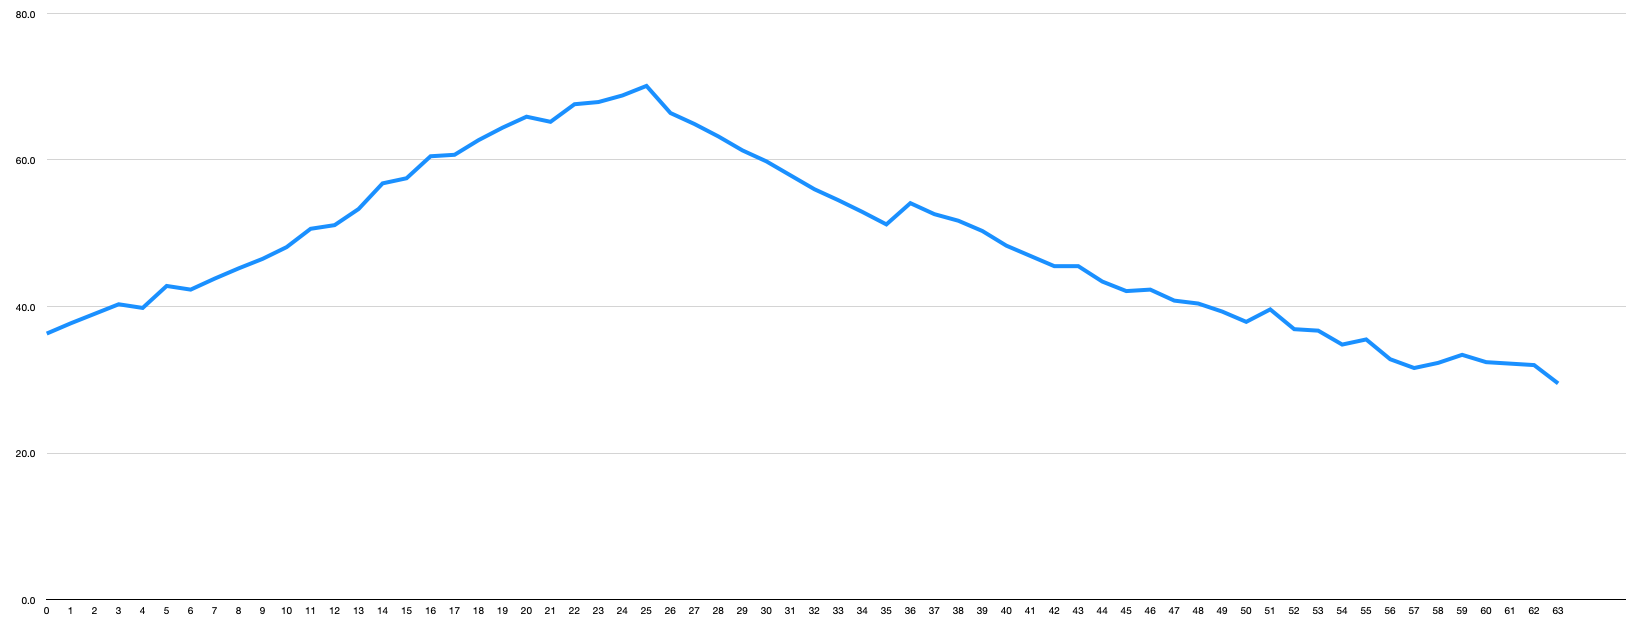

In [ ]:
test_A = [34.5,34.9,36.1,37.4,38.6,39.8,41.2,42.4,43.7,44.9,46.4,48.4,50.1,51.6,51.8,56.0,57.7,59.4,60.9,62.2,63.6,64.7,66.1,67.3,68.4,69.6,69.5,68.6,67.4,66.1,64.8,63.5,62.3,60.9,59.7,58.6,57.3,56.0,54.7,53.6,52.2,50.9,49.9,48.9,48.0,47.1,46.2,45.2,44.2,43.3,42.5,41.5,40.3,39.6,38.7,37.5,36.7,35.6,34.8,34.2,33.5,33.0,32.3,31.7]
tensor_A = tf.convert_to_tensor(test_A)
#print(tensor_t)

tensor_a_reshape = tf.reshape(tensor_A, [1,64,1])
#print(tensor_t_reshape)

prediction_A = motion_model.predict(tensor_a_reshape)
print(prediction_A[0])

max_index = 0
max_num = 0
i = 0
for x in prediction_A[0]:
  i = i + 1
  if x > max_num:
    max_index = i - 1
    max_num = x
  
print("\n")
print(result_strings[max_index])
print("Result determined with ", round(max_num * 100), "% certainty")


[0.6517091  0.00329792 0.04670173 0.2982912 ]


PASS!
This EM has passed its temperature check, continue with the QC process.
Result determined with  65 % certainty


### Test 2
Now let's try one that should predict a failure. Below is a graph of an EM that didn't reach its desired peak temperature, where *blue* is an example of a pass, and *green* is the data we're passing into our modle to check.
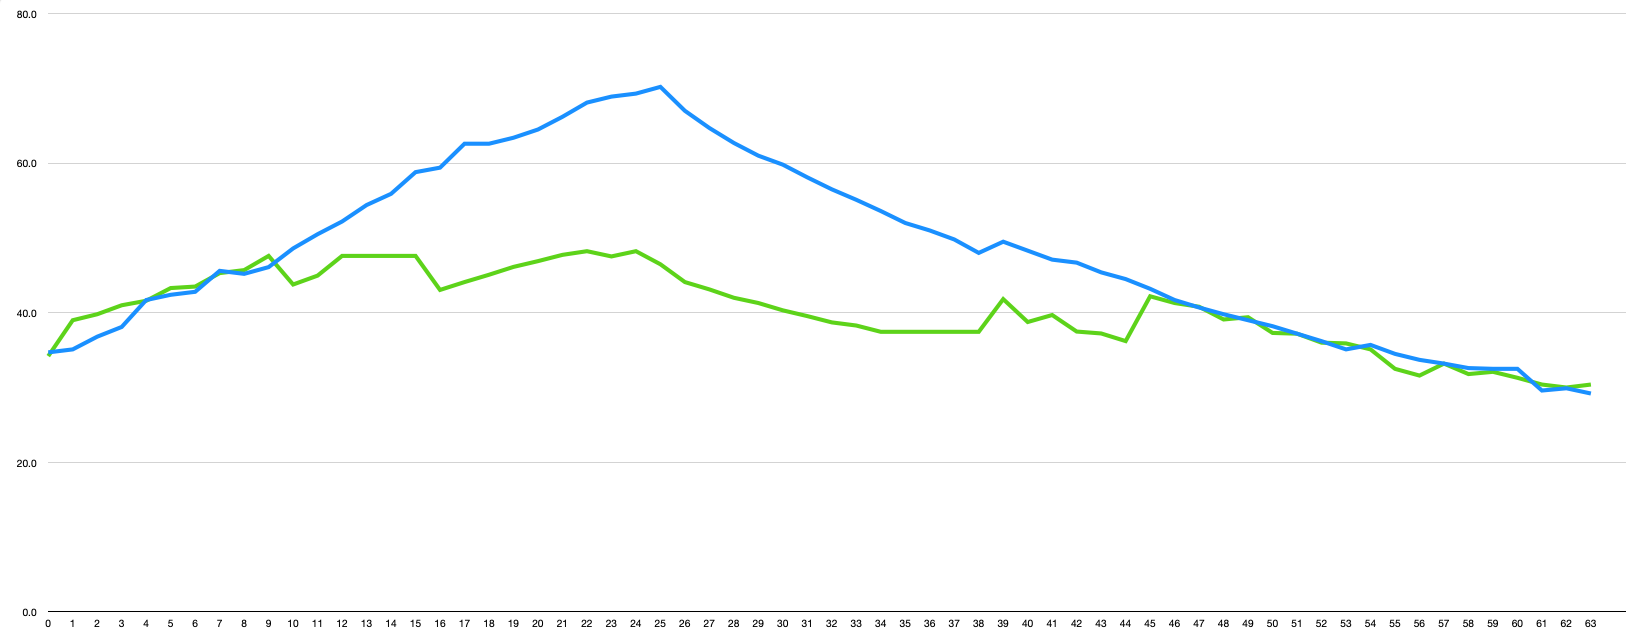


In [ ]:
test_B = [33.9,35.6,36.5,37.5,39.3,40.2,41.6,42.6,44.3,46.0,46.0,46.0,46.0,46.0,46.0,46.0,46.0,43.9,44.4,44.8,45.6,46.4,47.2,47.7,48.9,49.5,47.0,45.4,44.2,43.3,42.4,41.6,40.7,39.8,39.1,38.2,37.5,36.7,46.5,46.5,46.5,46.5,46.5,45.5,44.7,44.1,43.2,42.7,41.7,40.5,39.5,38.9,37.8,36.7,34.8,35.3,32.9,33.8,33.6,32.7,31.5,31.9,31.6,30.7]
tensor_B = tf.convert_to_tensor(test_B)
#print(tensor_t)

tensor_b_reshape = tf.reshape(tensor_B, [1,64,1])
#print(tensor_t_reshape)

prediction_B = motion_model.predict(tensor_b_reshape)
print(prediction_B[0])

max_index = 0
max_num = 0
i = 0
for x in prediction_B[0]:
  i = i + 1
  if x > max_num:
    max_index = i - 1
    max_num = x
  
print("\n")
print(result_strings[max_index])
print("Result determined with ", round(max_num * 100), "% certainty")

[8.2969498e-05 9.8217541e-01 1.7825172e-08 1.7741606e-02]


FAIL.
This EM failed its temperature check because the temperature did not rise to set peak.
Result determined with  98 % certainty


### Test 3
Let's try another fail. This time, the failure reason will be because the EM took too long to follow the set temperature curve.
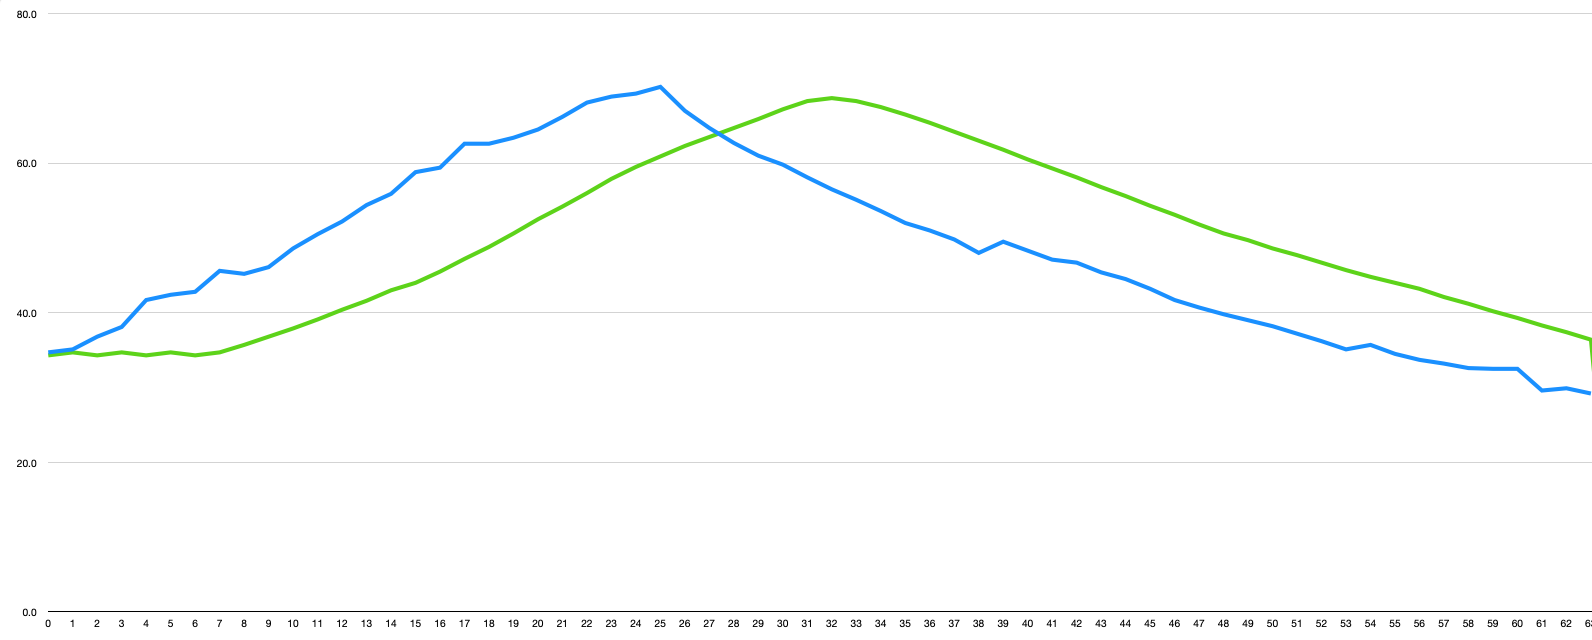

In [ ]:
test_c = [34.0,35.6,35.6,34.0,35.6,34.0,35.6,34.0,35.6,34.0,35.6,34.0,35.6,34.0,35.6,39.2,40.9,41.9,43.1,44.0,45.0,46.0,49.3,52.0,53.4,51.7,57.8,59.9,61.7,63.5,63.6,65.0,66.0,67.3,68.6,69.5,69.8,71.5,68.3,64.9,63.4,61.5,60.5,58.8,57.7,56.5,55.3,54.1,52.7,51.5,50.4,49.3,48.0,46.9,46.3,45.6,44.8,43.9,43.2,42.4,41.6,40.8,39.9,38.3]
tensor_C = tf.convert_to_tensor(test_c)
#print(tensor_t)

tensor_c_reshape = tf.reshape(tensor_C, [1,64,1])
#print(tensor_t_reshape)

prediction_C = motion_model.predict(tensor_c_reshape)
print(prediction_C[0])

max_index = 0
max_num = 0
i = 0
for x in prediction_C[0]:
  i = i + 1
  if x > max_num:
    max_index = i - 1
    max_num = x
  
print("\n")
print(result_strings[max_index])
print("Result determined with ", round(max_num * 100), "% certainty")

[1.3850563e-06 1.3877536e-02 9.5665509e-01 2.9465932e-02]


FAIL.
This EM failed its temperature check because it took too long to follow set temperature curve.
Result determined with  96 % certainty


### Test 4
Last test! Let's pass the model an example of an EM that reached its peak temperature, but took too long to cool down after.
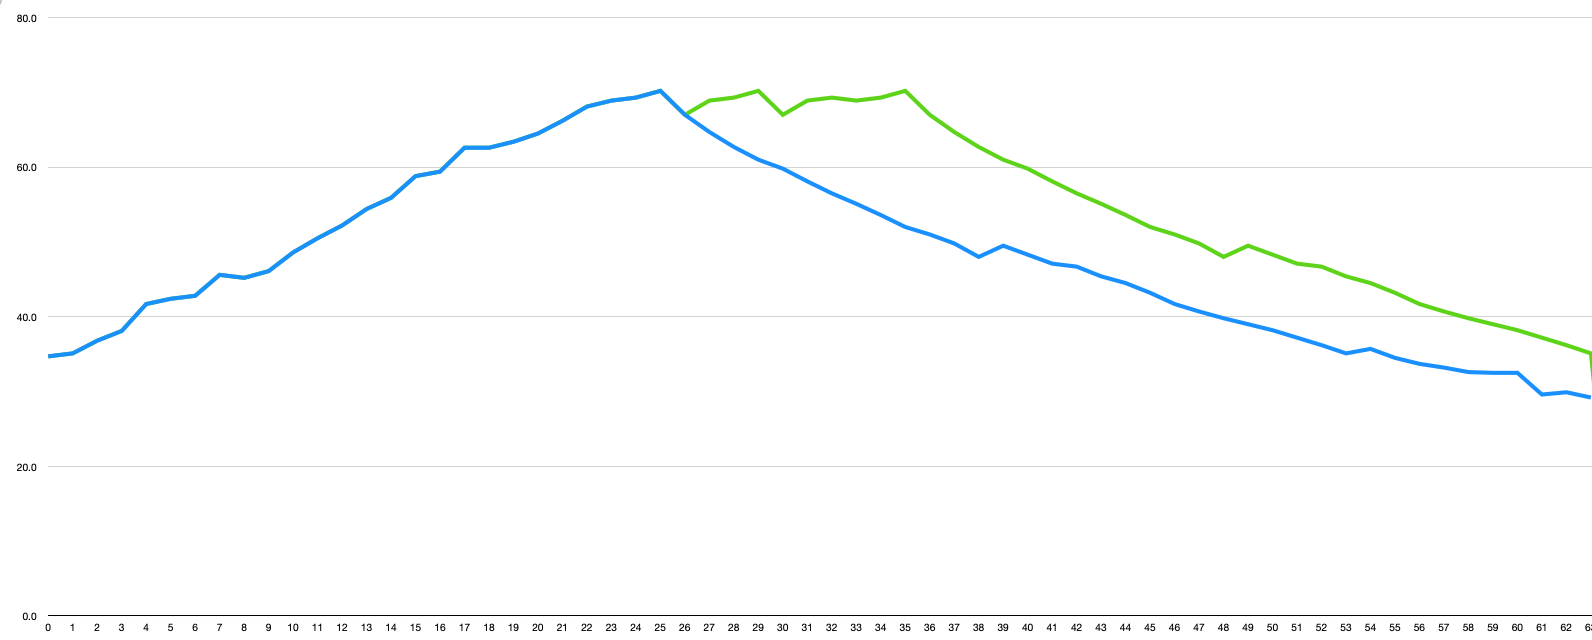

In [ ]:
test_D = [36.7,36.6,39.8,40.7,42.4,43.8,44.6,46.3,46.4,49.9,51.8,53.6,55.7,57.4,59.3,61.2,62.8,63.8,64.4,64.9,66.3,67.2,69.4,70.2,69.4,70.2,70.9,68.5,69.4,70.2,70.9,68.5,69.4,69.4,70.2,70.9,68.5,65.0,63.5,62.5,61.1,60.1,59.0,57.9,56.9,54.9,54.3,52.8,52.2,50.6,49.4,48.2,47.8,46.8,45.7,44.9,43.9,43.4,41.7,40.4,39.1,37.9,37.4,36.8]
tensor_D = tf.convert_to_tensor(test_D)
#print(tensor_t)

tensor_d_reshape = tf.reshape(tensor_D, [1,64,1])
#print(tensor_t_reshape)

prediction_D = motion_model.predict(tensor_d_reshape)
print(prediction_D[0])

max_index = 0
max_num = 0
i = 0
for x in prediction_D[0]:
  i = i + 1
  if x > max_num:
    max_index = i - 1
    max_num = x
  
print("\n")
print(result_strings[max_index])
print("Result determined with ", round(max_num * 100), "% certainty")

[0.04749681 0.11250599 0.01390279 0.82609445]


FAIL.
This EM failed its temperature check because it took too long to cool after reaching peak temperature.
Result determined with  83 % certainty
